# Pandas Refresher Lab

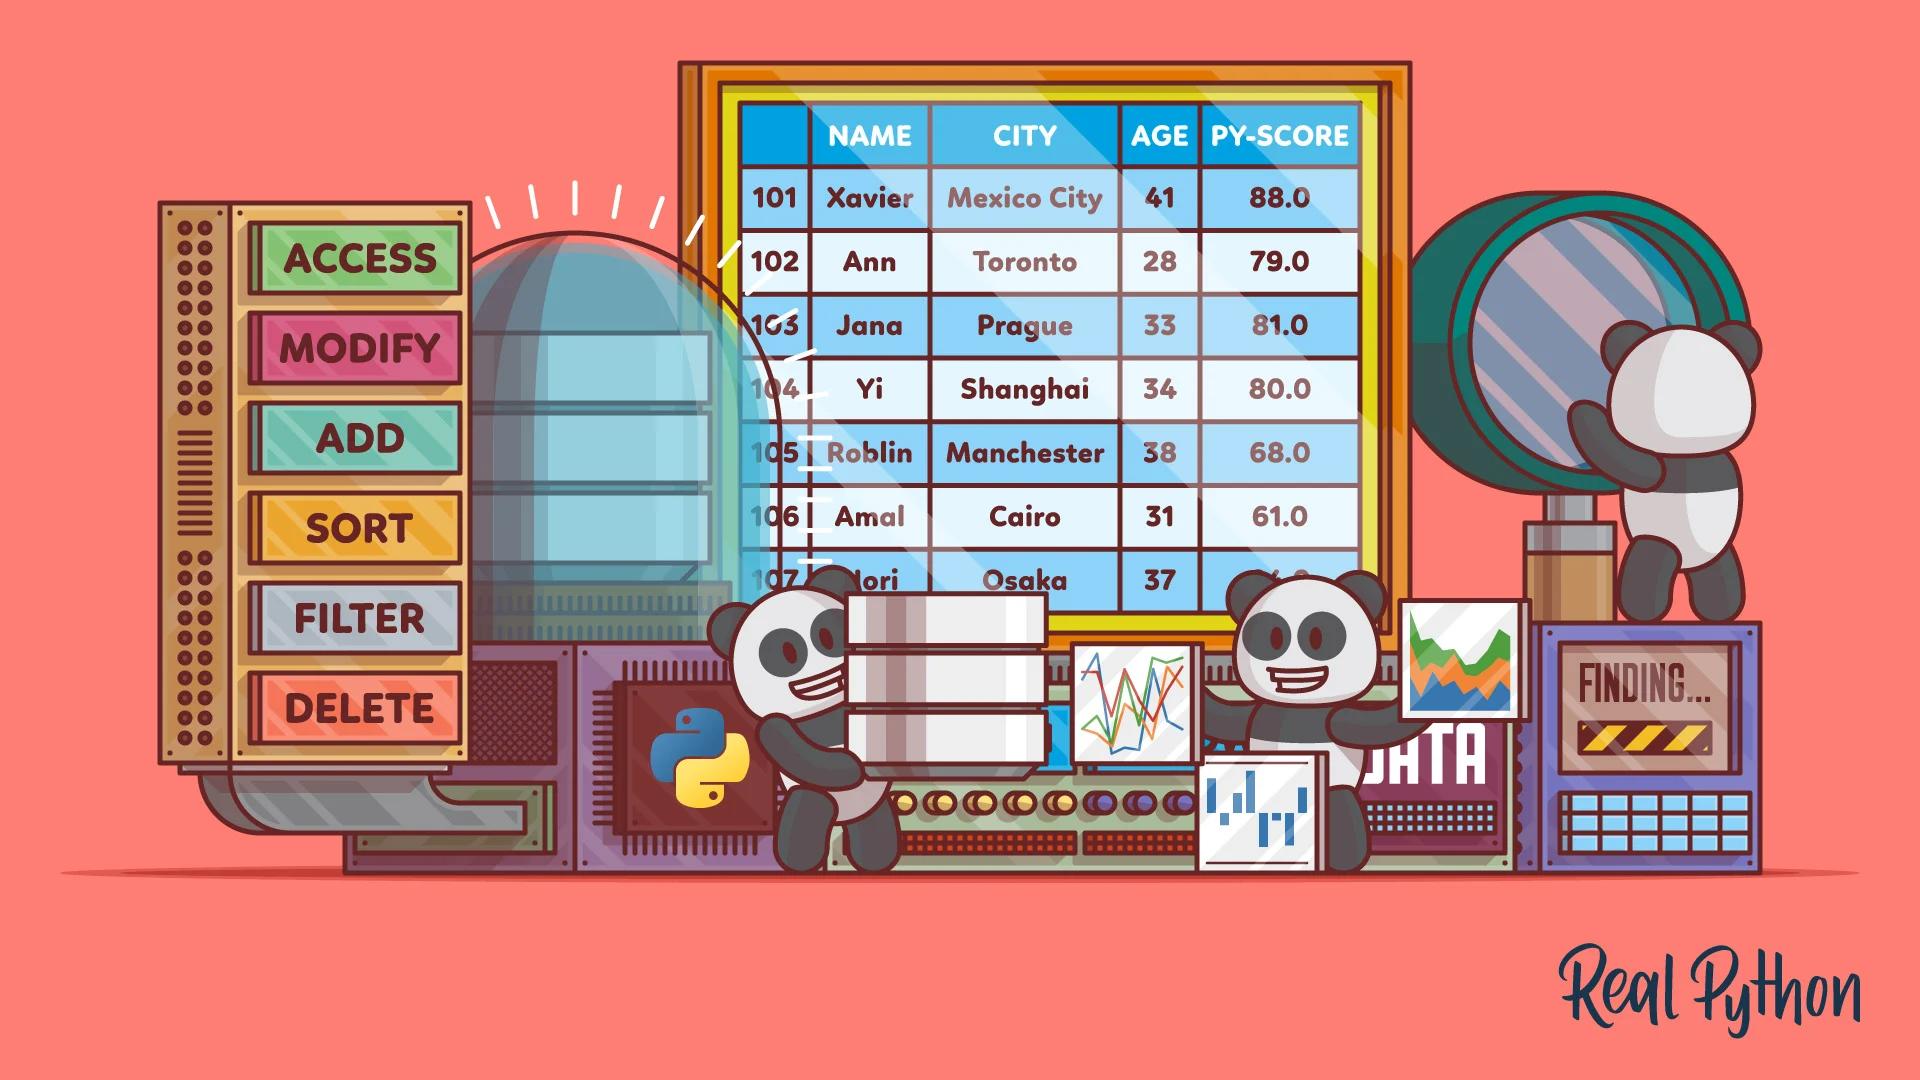

#### Exercises built from dataset used for PyCon 2018 presentation by Kevin Markham


### 1. Import pandas and check the version.

In [30]:
import pandas as pd
print(pd. __version__)

2.0.3


### 2. Import matplotlib and specify inline usage.

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

## Dataset: Stanford Open Policing Project

https://openpolicing.stanford.edu/

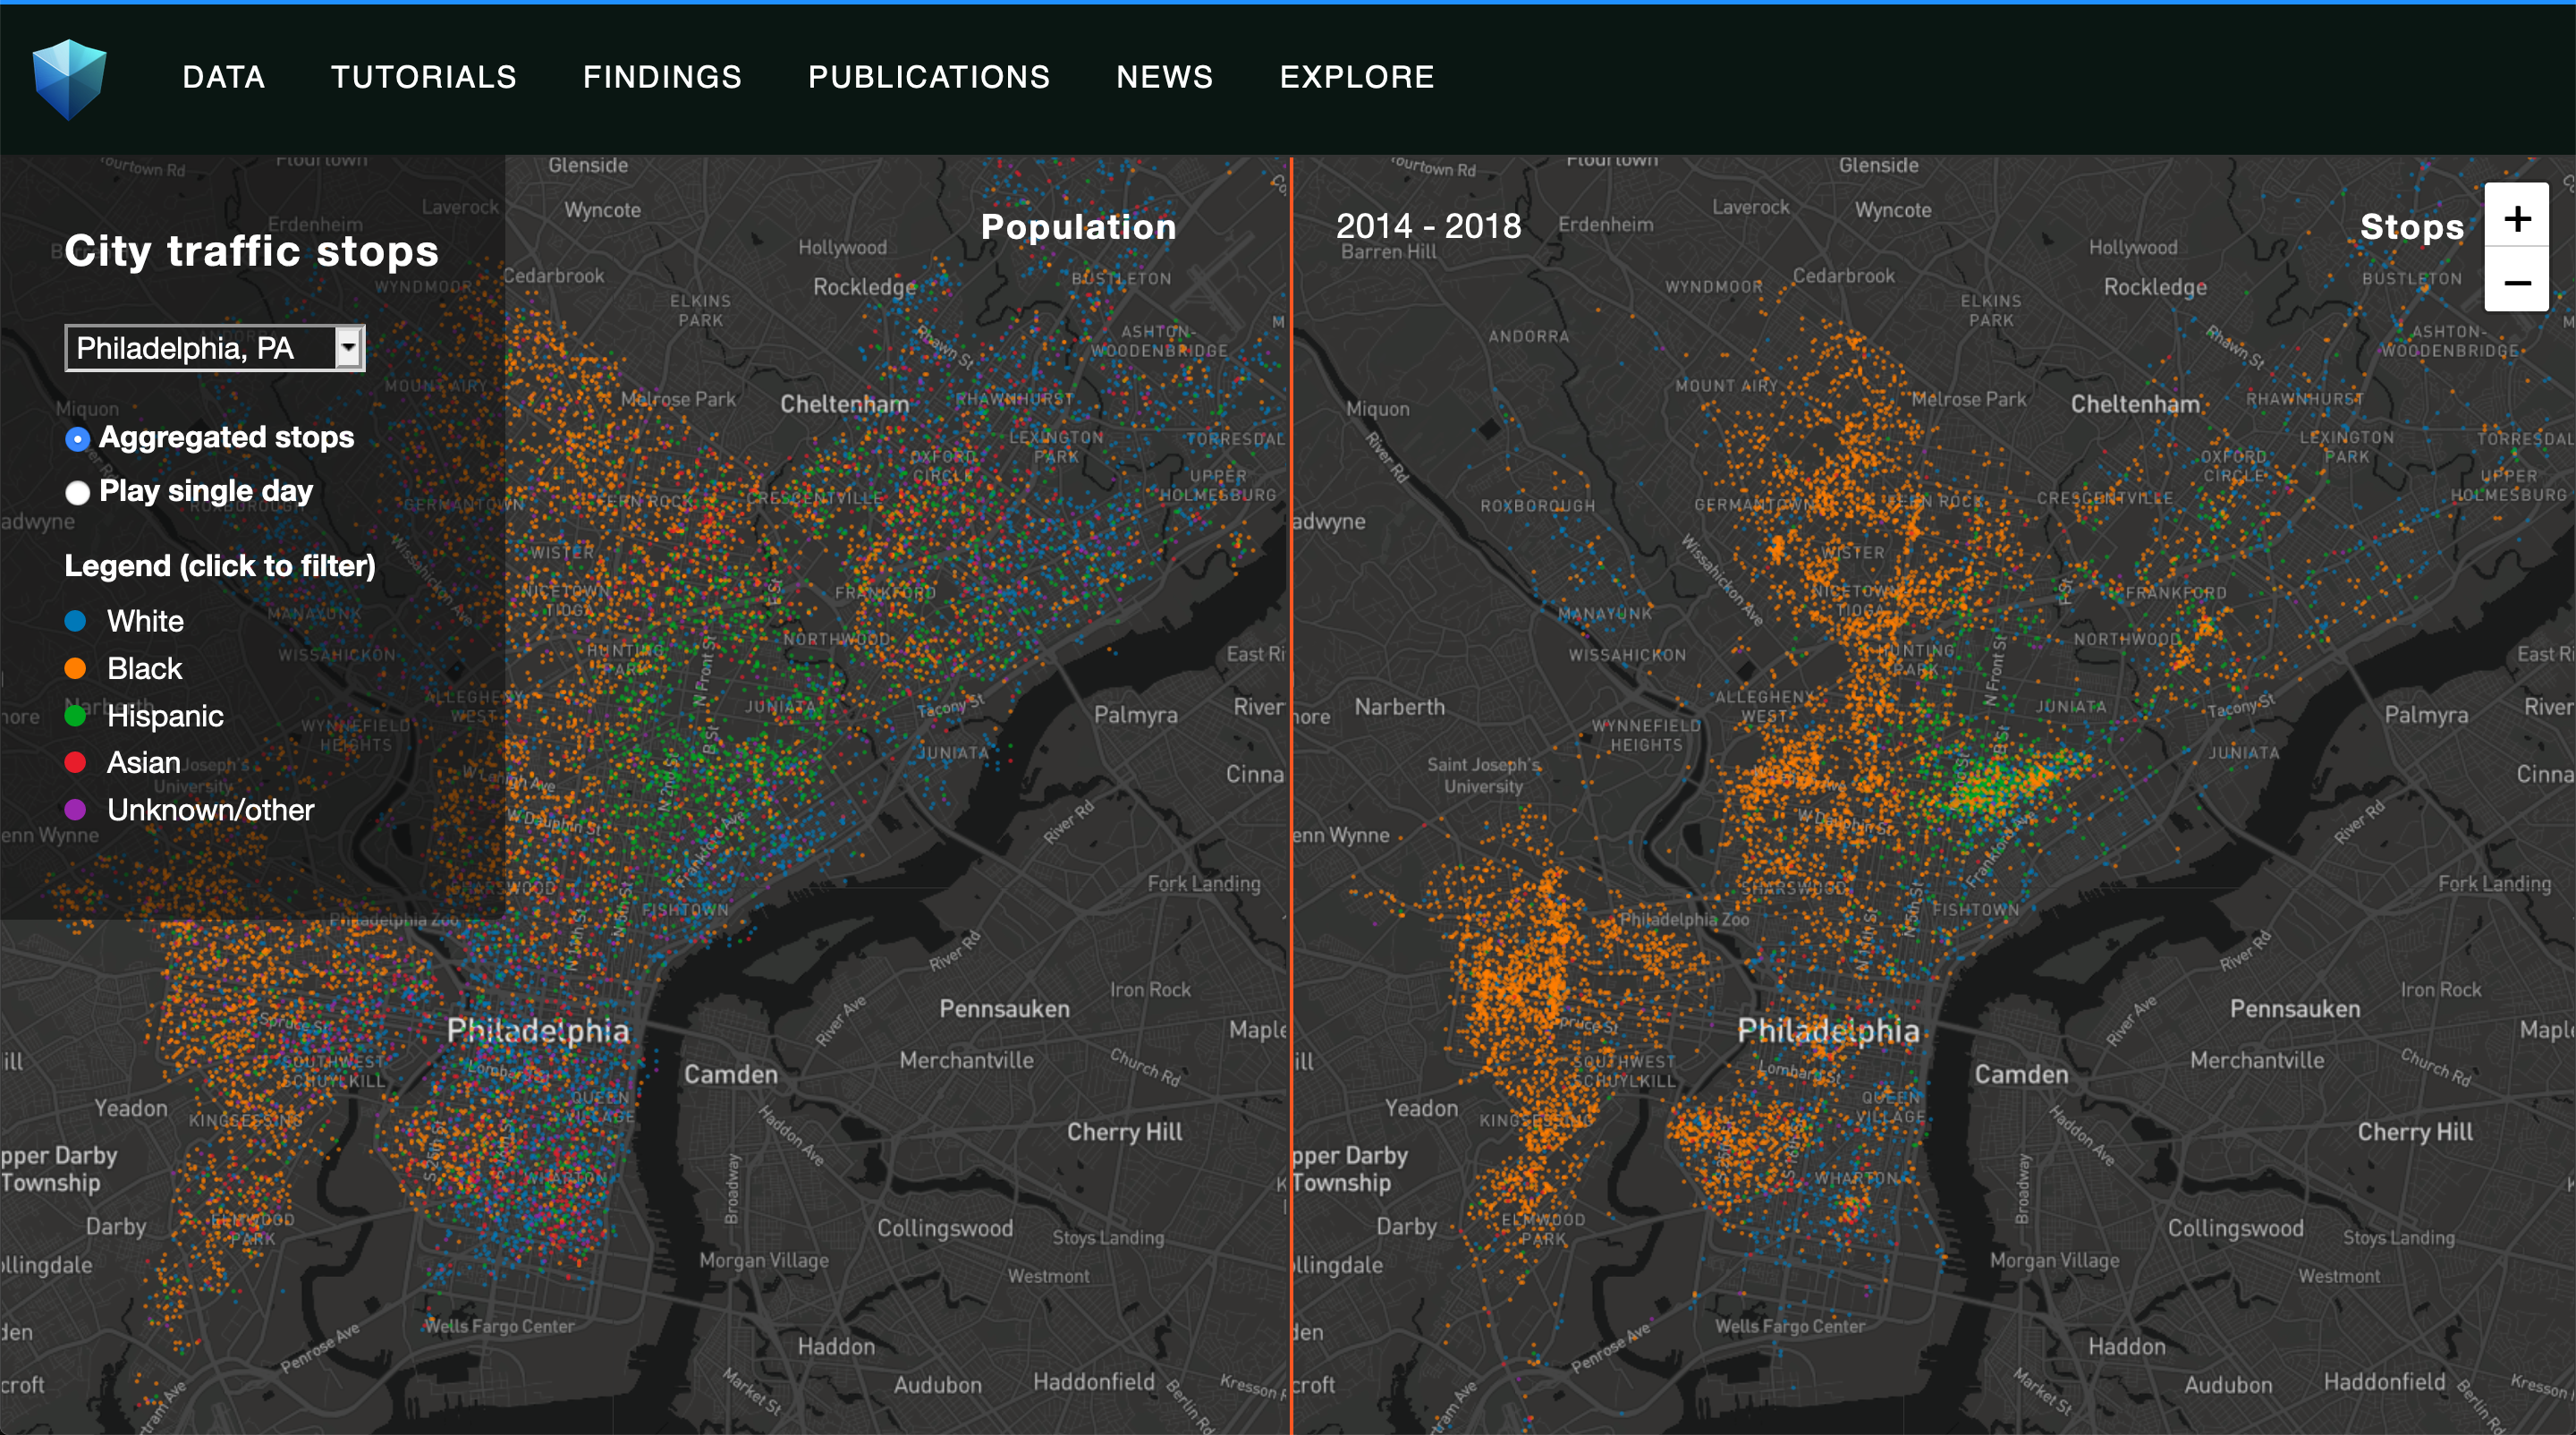

### 3. Read the police csv into a dataframe.

In [32]:
df = pd.read_csv('police.csv')

### 4. Use the head command to print the first five rows.

In [33]:
df.head()

stop_date stop_time  county_name driver_gender  driver_age_raw  \
0  2005-01-02     01:55          NaN             M          1985.0   
1  2005-01-18     08:15          NaN             M          1965.0   
2  2005-01-23     23:15          NaN             M          1972.0   
3  2005-02-20     17:15          NaN             M          1986.0   
4  2005-03-14     10:00          NaN             F          1984.0   

   driver_age driver_race     violation_raw violation  search_conducted  \
0        20.0       White          Speeding  Speeding             False   
1        40.0       White          Speeding  Speeding             False   
2        33.0       White          Speeding  Speeding             False   
3        19.0       White  Call for Service     Other             False   
4        21.0       White          Speeding  Speeding             False   

  search_type   stop_outcome is_arrested stop_duration  drugs_related_stop  
0         NaN       Citation       False      0-15 Min               False  
1         NaN       Citation       False      0-15 Min               False  
2         NaN       Citation       False      0-15 Min               False  
3         NaN  Arrest Driver        True     16-30 Min               False  
4         NaN       Citation       False      0-15 Min               False

### 5. Determine the shape of the dataframe.

In [34]:
df.shape

(91741, 15)

### 6. Determine the data type of each column.

In [35]:
df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

### 7. Print out the number of null (missing) values in each column.

In [36]:
len(df.index) - df.count()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

### 8. Remove the column that only contains missing values.

In [37]:
del df['county_name']

### 9. Print out the shape of the updated dataframe.

In [38]:
df.shape

(91741, 14)

### 10. Print out a list of the dataframe columns.

In [39]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

### 11. Determine the number of speeding violations by gender.

In [40]:
df.groupby(['driver_gender', 'violation' ]).count()


stop_date  stop_time  driver_age_raw  \
driver_gender violation                                                   
F             Equipment                 2487       2487            2486   
              Moving violation          3204       3204            3204   
              Other                      690        690             690   
              Registration/plates       1013       1013            1013   
              Seat belt                  635        635             635   
              Speeding                 15482      15482           15482   
M             Equipment                 8533       8533            8533   
              Moving violation         13020      13020           13020   
              Other                     3627       3627            3627   
              Registration/plates       2419       2419            2419   
              Seat belt                 2317       2317            2317   
              Speeding                 32979      32979           32979   

                                   driver_age  driver_race  violation_raw  \
driver_gender violation                                                     
F             Equipment                  2484         2487           2487   
              Moving violation           3195         3204           3204   
              Other                       685          690            690   
              Registration/plates        1012         1013           1013   
              Seat belt                   635          635            635   
              Speeding                  15453        15482          15482   
M             Equipment                  8523         8533           8533   
              Moving violation          12969        13020          13020   
              Other                      3519         3627           3627   
              Registration/plates        2415         2419           2419   
              Seat belt                  2317         2317           2317   
              Speeding                  32906        32979          32979   

                                   search_conducted  search_type  \
driver_gender violation                                            
F             Equipment                        2487          106   
              Moving violation                 3204          116   
              Other                             690           39   
              Registration/plates              1013           67   
              Seat belt                         635            8   
              Speeding                        15482          135   
M             Equipment                        8533          598   
              Moving violation                13020          779   
              Other                            3627          171   
              Registration/plates              2419          267   
              Seat belt                        2317           88   
              Speeding                        32979          822   

                                   stop_outcome  is_arrested  stop_duration  \
driver_gender violation                                                       
F             Equipment                    2487         2487           2487   
              Moving violation             3204         3204           3204   
              Other                         690          690            690   
              Registration/plates          1013         1013           1013   
              Seat belt                     635          635            635   
              Speeding                    15482        15482          15482   
M             Equipment                    8533         8533           8533   
              Moving violation            13020        13020          13020   
              Other                        3627         3627           3627   
              Registration/plates          2419         2419           2419   
    

### 12. When a man is pulled over, what percent of the time is it for speeding?

In [41]:
speedman = df[(df['violation']=='Speeding') & (df['driver_gender']== 'M')]
violationman = (df['driver_gender']== 'M')
speedman.count()/violationman.count()


stop_date             0.359479
stop_time             0.359479
driver_gender         0.359479
driver_age_raw        0.359479
driver_age            0.358684
driver_race           0.359479
violation_raw         0.359479
violation             0.359479
search_conducted      0.359479
search_type           0.008960
stop_outcome          0.359479
is_arrested           0.359479
stop_duration         0.359479
drugs_related_stop    0.359479
dtype: float64

### 13. When a woman is pulled over, what percent of the time is it for speeding?

In [42]:
speedw = df[(df['violation']=='Speeding') & (df['driver_gender']== 'F')]
violationw = (df['driver_gender']== 'F')
speedw.count()/violationw.count()

stop_date             0.168758
stop_time             0.168758
driver_gender         0.168758
driver_age_raw        0.168758
driver_age            0.168442
driver_race           0.168758
violation_raw         0.168758
violation             0.168758
search_conducted      0.168758
search_type           0.001472
stop_outcome          0.168758
is_arrested           0.168758
stop_duration         0.168758
drugs_related_stop    0.168758
dtype: float64

### 14. Use a groupby to determine the percentage of violation type for each gender.

For example, the distribution for women might be 80% speeding, 10% seat belt, and 10% moving violation.

In [43]:
df.groupby(['violation', 'driver_gender'])['driver_gender'].count()/df.groupby('driver_gender')['violation'].count()*100

violation            driver_gender
Equipment            F                10.578027
                     M                13.567056
Moving violation     F                13.627664
                     M                20.701169
Other                F                 2.934796
                     M                 5.766754
Registration/plates  F                 4.308621
                     M                 3.846093
Seat belt            F                 2.700863
                     M                 3.683918
Speeding             F                65.850028
                     M                52.435011
dtype: float64

### 15. Does gender affect who gets searched during a stop? Use a groupby or similar approach to compare.

In other words, what percent of the time does a male get searched during a stop? What about a female?

In [44]:
df.groupby(['search_conducted', 'driver_gender'])['driver_gender'].count()/df.groupby('driver_gender')['search_conducted'].count()*100

search_conducted  driver_gender
False             F                97.996682
                  M                95.667382
True              F                 2.003318
                  M                 4.332618
dtype: float64

### 16. What if one gender gets pulled over for violations that necessitate a search? Let's look at this another way. Determine the percentage of time that a driver is searched based on violation and then gender.

In [45]:
df.groupby(['search_conducted', 'violation', 'driver_gender'])['driver_gender'].count()/df.groupby('driver_gender')['search_conducted'].count()*100

search_conducted  violation            driver_gender
False             Equipment            F                10.127175
                                       M                12.616265
                  Moving violation     F                13.134278
                                       M                19.462596
                  Other                F                 2.768917
                                       M                 5.494872
                  Registration/plates  F                 4.023649
                                       M                 3.421576
                  Seat belt            F                 2.666837
                                       M                 3.544002
                  Speeding             F                65.275828
                                       M                51.128071
True              Equipment            F                 0.450853
                                       M                 0.950791
                  Movin

### 17. We next want to examine how often the driver is frisked, but this is a little tricky due to multiple search types in that field. First, do a value_counts on the search_type column.

In [46]:
df['search_type'].value_counts()

search_type
Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Fr

### 18. Parse the strings in the search_type column to get a count of how many times each search type was part of the search conducted. 

For example, "Inventory,Reasonable Suspicion     4" should increase the count of both Inventory and Reasonable Suspicion by 4.

In [47]:
df['search_type'].str.split(',').explode().value_counts()


search_type
Incident to Arrest      1566
Probable Cause          1182
Inventory                439
Reasonable Suspicion     314
Protective Frisk         274
Name: count, dtype: int64

### 19. Create a new column called "frisk" that is true if the phrase "Protective Frisk" is in the search_type field and false if it is not.

In [48]:
def get_frisk(search_type):
    if 'Protective Frisk' in str(search_type): 
        return True
    else: return False
df['frisk'] = df['search_type'].apply(get_frisk)
df['frisk'].value_counts()

frisk
False    91467
True       274
Name: count, dtype: int64

### 20. What percent of the time was a person frisked when a search was conducted?

In [49]:
df['frisk'].value_counts()
frisked = 274/(91467+274) *100
frisked

0.29866689920537165

### 21. How many stops were there in each of the years represented in this dataset?

In [50]:
df['year'] = df['stop_date'].str[:4]
df['year'].value_counts()

year
2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: count, dtype: int64

### 22. Why do you think one particular year's number of stops is so much lower than the rest?

The year was not completley over when the data was taken.

### 23. What percent of the time is the stop related to drugs?

In [52]:
from sklearn import preprocessing
df['drugs_related_stop'].value_counts()/df['drugs_related_stop'].count() *100


drugs_related_stop
False    99.111629
True      0.888371
Name: count, dtype: float64

### 24. How does this percentage of stops related to drugs vary over the course of a day?

In [54]:
df['hour'] = df['stop_time'].str[:2]
df.groupby(['hour'])['drugs_related_stop'].value_counts()/df['drugs_related_stop'].value_counts()/df['drugs_related_stop'].count() *100


hour  drugs_related_stop
00    False                 0.000061
      True                  0.000138
01    False                 0.000053
      True                  0.000080
02    False                 0.000035
      True                  0.000062
03    False                 0.000014
      True                  0.000027
04    False                 0.000003
      True                  0.000004
05    False                 0.000003
      True                  0.000001
06    False                 0.000039
      True                  0.000013
07    False                 0.000055
      True                  0.000020
08    False                 0.000062
      True                  0.000019
09    False                 0.000081
      True                  0.000058
10    False                 0.000088
      True                  0.000056
11    False                 0.000070
      True                  0.000055
12    False                 0.000043
      True                  0.000021
13    False  

### 25. Make a basic plot of the drug related stop percentage by hour of the day.

<Axes: title={'center': 'Percentage of Drug Stops by Hour'}, xlabel='hour'>

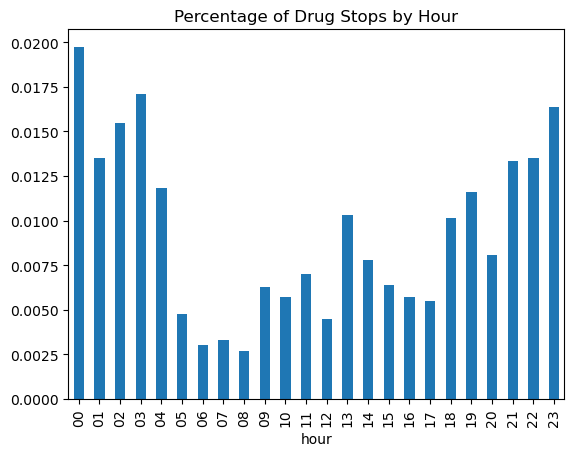

In [55]:
df['drugs'] = df['drugs_related_stop'].value_counts()/df['drugs_related_stop'].count() *100
df.groupby('hour')['drugs_related_stop'].value_counts(normalize=True).unstack()[True].plot.bar(title='Percentage of Drug Stops by Hour')

### 26. Are there any surprises in the drug related percentage by hour plot?

No, most drug crimes happen late at night.

### 27. What are the five most common hours that people are stopped?

<Axes: xlabel='hour,violation'>

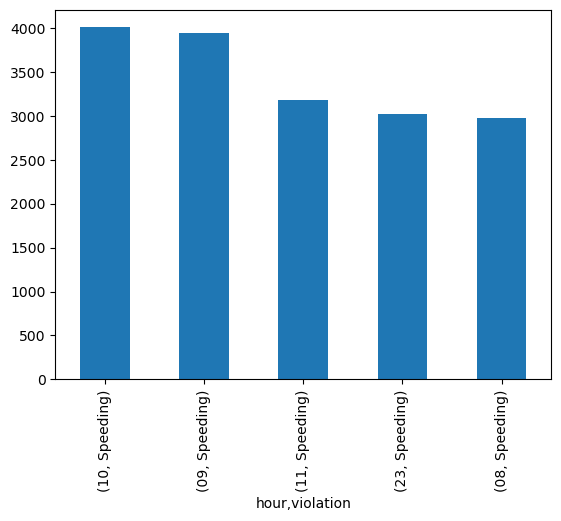

In [70]:
total_violation = df['violation'].count()

df.groupby('hour')['violation'].value_counts().nlargest().plot.bar()

### 28. Compare the age distributions for each violation by grouping by violation and then using the describe function.

In [71]:
df.groupby(['driver_age'])['violation'].describe()

count unique               top  freq
driver_age                                     
15.0           5      2  Moving violation     4
16.0          45      5          Speeding    26
17.0         585      6          Speeding   424
18.0        1733      6          Speeding  1181
19.0        3228      6          Speeding  2074
...          ...    ...               ...   ...
88.0           2      1          Speeding     2
89.0           1      1         Equipment     1
90.0           1      1          Speeding     1
94.0           1      1  Moving violation     1
99.0           1      1  Moving violation     1

[78 rows x 4 columns]

### 29. Who is the oldest person to get a speeding violation in this dataset?

A 90 year old for a speeding violation

### 30. Use ChatGPT to write a story about why this person was speeding.

In the small town of Willow Creek, everyone knew Mildred Thompson, a sprightly 90-year-old with a twinkle in her eye and a spirit that belied her age. She was the kind of woman who could outpace most of the younger residents, her laughter echoing through the community center where she played bingo every Wednesday.

One sunny afternoon, Mildred decided to attend a special gathering at the center—a surprise party for her best friend, Doris, who was turning 92. Mildred had been planning this for weeks, determined to make it a celebration to remember. She had baked Doris's favorite carrot cake, complete with cream cheese frosting, and packed it carefully into her old, reliable sedan.

As she set out from her cozy little cottage, she was filled with excitement. The invitation had said everyone should arrive by 3 PM, and she couldn’t bear the thought of being late. The roads were clear, and the sun was shining, but as Mildred navigated the familiar streets, a mischievous thought crossed her mind: "What if I can still make it in time?"

With a cheeky grin, she pressed down on the accelerator just a little harder than usual. The speedometer crept up, and before she knew it, she was exceeding the speed limit. The wind whistled through her open window, and she felt a rush of exhilaration. In that moment, she was not just a grandmother; she was a woman on a mission.

Just as she rounded a bend, flashing lights appeared in her rearview mirror. Mildred's heart sank. She pulled over, her mind racing. What would the officer think? She imagined the headline: "Ninety-Year-Old Speed Demon Caught Racing to a Birthday Party!"

Officer Jenkins, a kind and patient man known for his gentle demeanor, approached her car. He raised an eyebrow, a hint of a smile tugging at his lips as he recognized her.

“Mildred! What’s the hurry?” he asked, trying to suppress his laughter.

“I’m racing to Doris’s surprise party!” she replied, her cheeks flushed with embarrassment. “I baked her a cake, and I can’t let it sit in the car too long!”

Officer Jenkins chuckled, shaking his head. “Well, you’ve got the spirit, that’s for sure. But you know we can’t have you speeding like that.”

Mildred pouted playfully. “But I’m not done living yet! Can’t I have a little fun?”

He sighed, trying to maintain a semblance of authority. “I’ll tell you what. I won’t write you a ticket this time, but you need to promise to slow down and keep those cakes safe.”

Relieved, Mildred nodded vigorously. “You have my word! But you should come to the party!”

With a friendly wave, Officer Jenkins returned to his car, and Mildred took off again, this time at a more reasonable speed. As she pulled into the community center parking lot, she could see the decorations and hear the cheerful voices of her friends. She hurried inside, the cake in hand, just as everyone shouted, “Surprise!”

Doris’s eyes sparkled with joy as Mildred revealed the cake, and laughter filled the air. As they celebrated, Mildred thought about how life was too short to hold back, even at 90. Sometimes, a little speed was just what one needed to keep the spirit alive.